##### Оригинальная статья:
https://www.researchgate.net/publication/350811193_UWB-gestures_a_public_dataset_of_dynamic_hand_gestures_acquired_using_impulse_radar_sensors
https://www.nature.com/articles/s41597-021-00876-0

##### Данные:
https://figshare.com/articles/dataset/A_Public_Dataset_of_Dynamic_Hand-gestures_Acquired_using_Impulse-radar_sensors_/12652592

##### MATLAB:
https://www.mathworks.com/help/signal/ug/hand-gesture-classification-using-radar-signals-and-deep-learning.html

# UWB-gestures (жесты):
<h3 style="text-align: left;"><b>Подготовил:</b> Степанюк Денис Борисович</h3>

Данные записаны на 3 СШП радара <b>" XETHRU by NOVELDA X4M02 290056-010 "</b> расположеных слева, по центру и справа.

8 волонтёров записали по ~ 100 экземпляров 12 жестов, где 12-й жест это полное отсутсвие движения, снятых с трёх ракурсов.

1 экземпляр представляет собой двумерную матрицу записаную следующим образом:
- 20 раз в секунду радар присылает вектор с данными длинной 189.
- Запись одного движения занимает 4.5 секунды.
- За 4.5 секунду радар присылает 90 векторов длинной 189
- Вектора склеивают в матрицу 90х189 чтобы получить " изображение ".

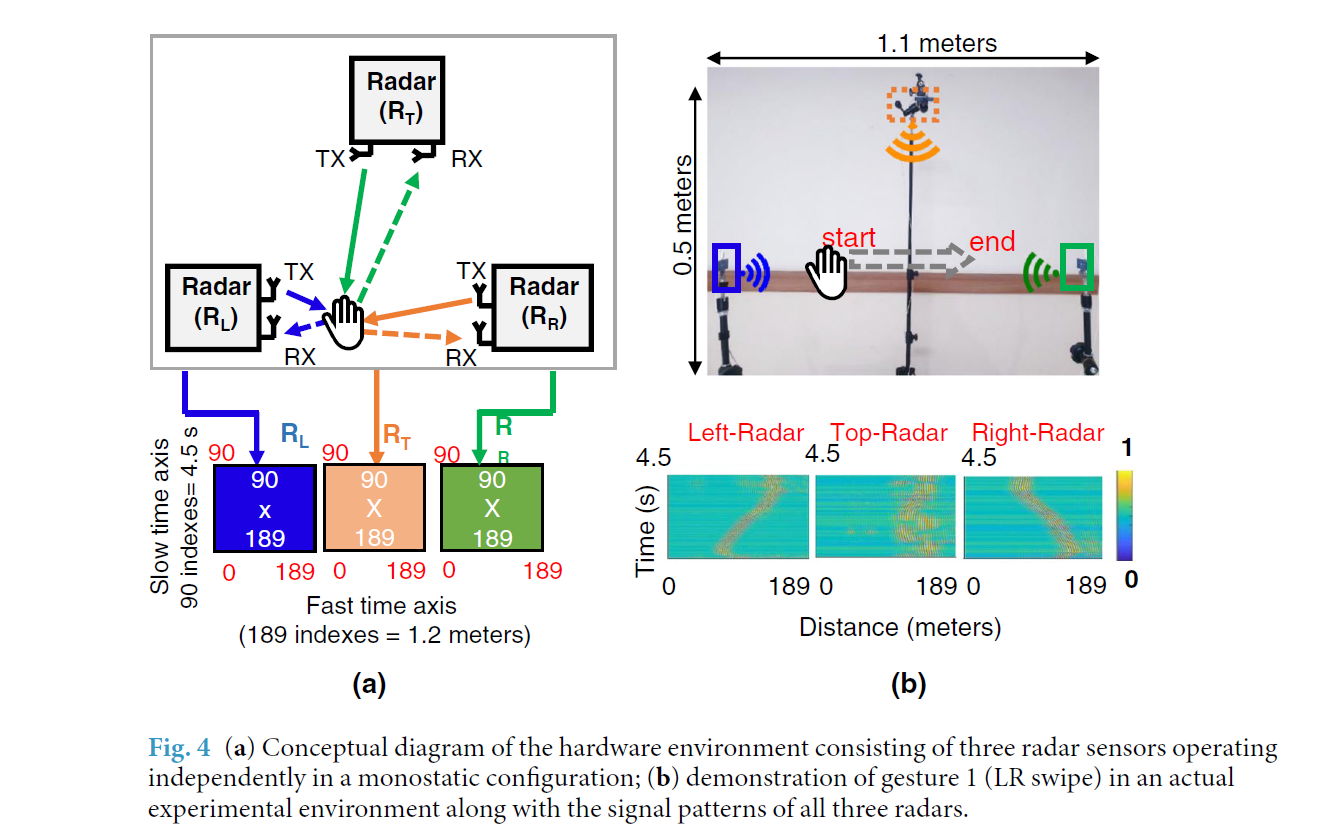

<h3 style="text-align: left;"><b>1.1 Загрузка данных:</b></h3>

In [3]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split

In [4]:
from numpy import genfromtxt
'''
zest(x, y, z) - конвертирует CSV экземпляр записаного сигнала в 2D numpy матрицу.


person - всего 8 добровольцев приняли участие в записи данных для датасета.

nomer - каждый доброволец записал по 12 разных жестов. Для каждого жеста каждый доброволец записал по 100 экземпляров.

clean: 
        0 - данные полные шумов.
        1 - очищенные от шумов данные.

'''

def zest(person, nomer, clean):

    # Компенсирует различие пунктуации, так как к разным файлам разный путь.
    if person == 1:
        beta = "Removed"
    else:
        beta = "Removed_"

    # Компенсирует различие пунктуации, так как к разным файлам разный путь.
    gamma = "Data_HV0"  
    if person == 3:
        gamma = "Data_HV_0"
    if person == 6:
        gamma = "HC0"   

    # Компенсирует различие пунктуации, так как к разным файлам разный путь.
    if person == 1 or person == 6:
        alpha = "HV_0"
    else:
        alpha = "HV0"

    # Загрузить очищенные от шумов данные:
    if clean:
    
        path = "C:\\Users\\Deniss\\Desktop\\apio\\NN\\CSV_DataSet_Gestures\\"
    
        path_LeftRadar_clean = path + "HV_0"+str(person)+"\\Clutter"+beta+gamma+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarLeft_ClutterRemoved_100samples.csv"
    
        path_RightRadar_clean = path + "HV_0"+str(person)+"\\Clutter"+beta+gamma+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarRight_ClutterRemoved_100samples.csv"
    
        path_CenterRadar_clean = path + "HV_0"+str(person)+"\\Clutter"+beta+gamma+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarTop_ClutterRemoved_100samples.csv"
    
        data_LeftRadar = genfromtxt(path_LeftRadar_clean, delimiter=',')
        data_RightRadar = genfromtxt(path_RightRadar_clean, delimiter=',')
        data_CenterRadar = genfromtxt(path_CenterRadar_clean, delimiter=',')
        #print(path_LeftRadar_clean)
        #print(path_RightRadar_clean)
        #print(path_CenterRadar_clean)

    # Загрузить данные полные шумов:
    else:

        path = "C:\\Users\\Deniss\\Desktop\\apio\\NN\\CSV_DataSet_Gestures\\"

        path_LeftRadar_raw = path + "HV_0"+str(person)+"\\RawData_"+alpha+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarLeft_Raw_100samples.csv"

        path_RightRadar_raw =  path + "HV_0"+str(person)+"\\RawData_"+alpha+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarRight_Raw_100samples.csv"

        path_CenterRadar_raw =  path + "HV_0"+str(person)+"\\RawData_"+alpha+str(person)+"\\" \
                        "HV"+str(person)+"_G"+str(nomer)+"_RadarTop_Raw_100samples.csv"
        
        data_LeftRadar = genfromtxt(path_LeftRadar_raw, delimiter=',')
        data_RightRadar = genfromtxt(path_RightRadar_raw, delimiter=',')
        data_CenterRadar = genfromtxt(path_CenterRadar_raw, delimiter=',')
        
    return data_LeftRadar, data_RightRadar, data_CenterRadar

In [5]:
'''
Функия обьеденяет жесты от разных людей в общий массив, то есть можно обьеденить все жесты от всех людей
по категориям по 12 массивов на каждый ракурс.
'''
def zest_upload(nomer, clean):
    LeftRadar_all = []
    RightRadar_all = []
    CenterRadar_all = []
    for person in range(1,9):
        #(person, nomer, clean)
        LeftRadar_person, RightRadar_person, CenterRadar_person = zest(person, nomer, clean)

        LeftRadar_person, RightRadar_person, CenterRadar_person = LeftRadar_person.reshape(-1, 90, 189), \
                        RightRadar_person.reshape(-1, 90, 189), CenterRadar_person.reshape(-1, 90, 189)

        LeftRadar_all.append(LeftRadar_person)
        RightRadar_all.append(RightRadar_person)
        CenterRadar_all.append(CenterRadar_person)

    return np.vstack(LeftRadar_all), np.vstack(RightRadar_all), np.vstack(CenterRadar_all)
    
    

In [6]:
'''
clean - очищенные от шумов данные.
(person, nomer, clean)
'''

ZEST_1_LeftRadar_clean, _, _ = zest_upload(1, 1)

ZEST_2_LeftRadar_clean, _, _ = zest_upload(2, 1)

ZEST_3_LeftRadar_clean, _, _ = zest_upload(3, 1)

ZEST_4_LeftRadar_clean, _, _ = zest_upload(4, 1)

ZEST_5_LeftRadar_clean, _, _ = zest_upload(5, 1)

ZEST_6_LeftRadar_clean, _, _ = zest_upload(6, 1)

ZEST_7_LeftRadar_clean, _, _ = zest_upload(7, 1)

ZEST_8_LeftRadar_clean, _, _ = zest_upload(8, 1)

ZEST_9_LeftRadar_clean, _, _ = zest_upload(9, 1)

ZEST_10_LeftRadar_clean, _, _ = zest_upload(10, 1)

ZEST_11_LeftRadar_clean, _, _ = zest_upload(11, 1)

ZEST_12_LeftRadar_clean, _, _ = zest_upload(12, 1)

In [7]:
print(ZEST_1_LeftRadar_clean.shape)

(800, 90, 189)


<h3 style="text-align: left;"><b>1.2 Графики отображение сигнала во времени с трёх ракурсов:</b></h3>

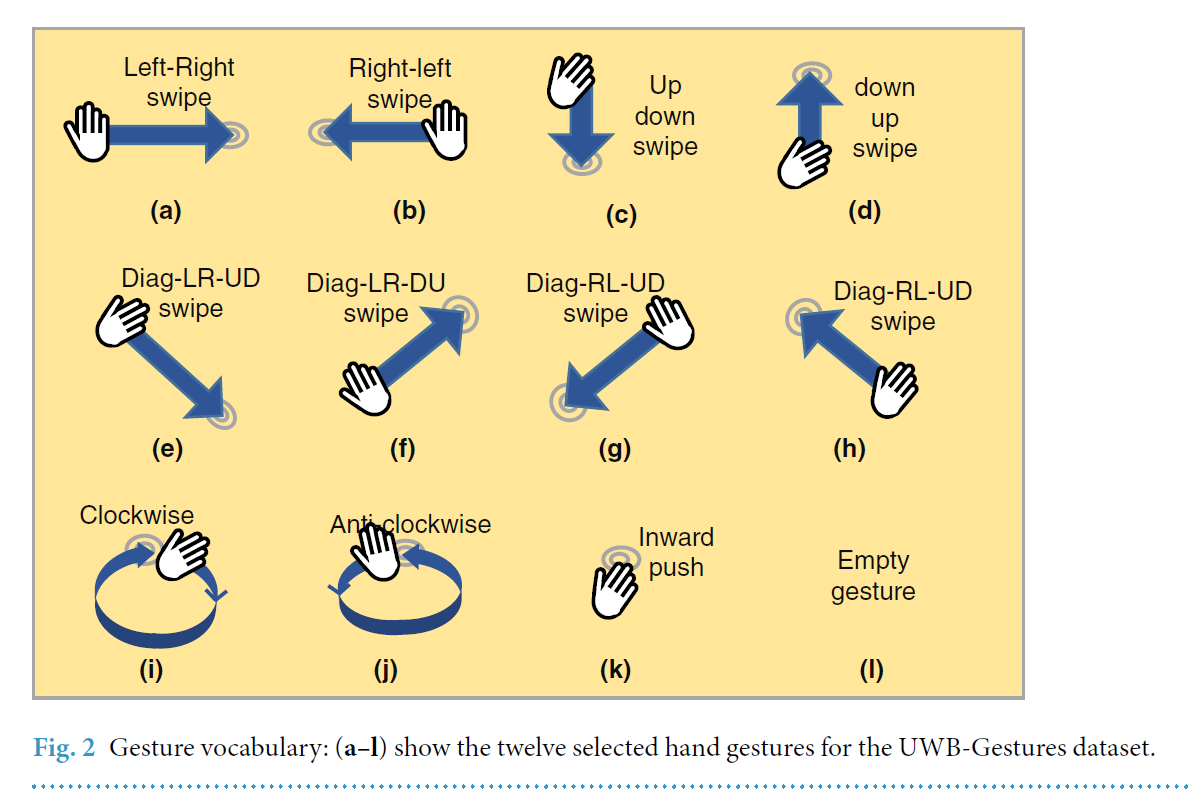

In [18]:
from matplotlib import pyplot as plt

def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

def three_point_of_view_plt(LeftRadar, el):
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12, 12), sharey=True, sharex=True)

    Radar = [LeftRadar[el]]
    Title = ["Radar"]
    i = 0
    
    imshow(Radar[i], title=Title[i],plt_ax=ax)
    #for fig_x in ax.flatten():
        #imshow(Radar[i], title=Title[i],plt_ax=fig_x)
        #i += 1

In [ ]:
'''
 Left-Right swipe: ZEST_1_LeftRadar_clean

 Right-Left swipe: ZEST_2_LeftRadar_clean

 Up-Down swipe:    ZEST_3_LeftRadar_clean

 Down-Up swipe:    ZEST_4_LeftRadar_clean

 Diag-LR-UD swipe: ZEST_5_LeftRadar_clean

 Diag-LR-DU swipe: ZEST_6_LeftRadar_clean

 Diag-RL-UD swipe: ZEST_7_LeftRadar_clean

 Diag-RL-DU swipe: ZEST_8_LeftRadar_clean

 Clockwise:        ZEST_9_LeftRadar_clean

 Anti-clockwise:   ZEST_10_LeftRadar_clean

 Inward push:      ZEST_11_LeftRadar_clean

 Empty:            ZEST_12_LeftRadar_clean
'''

Radar (clean): gesture


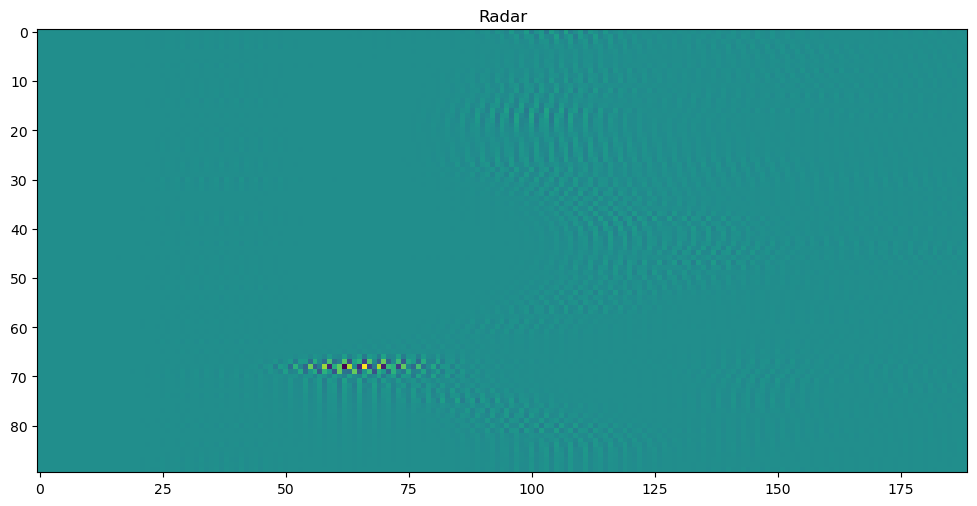

In [27]:
print("Radar (clean): gesture")
three_point_of_view_plt(ZEST_9_LeftRadar_clean, 18)

<h3 style="text-align: left;"><b>2.1 Подготовка датасета:</b></h3>

Буду использовать только очищенные данные с левого радара.

In [28]:
def prepare_Labels(Radar):
    # Список содержит кол-во экземпляров данных для каждого жеста.
    RadarShape = []
    for radar in Radar:
        RadarShape.append(radar.shape[0])
    
    # Общее кол-во экземпляров данных всех жестов.
    RadarLenght = 0
    for i in RadarShape:
        RadarLenght += i
    
    # Массив для записи лейблов так, чтобы каждый лейбл соответствовал по счёту своему
    # элементу в списке " LeftRadar "
    RadarLabels = np.zeros((RadarLenght,12))
    
    
    start_el = 0
    stop_el = 0
    label = 0
    
    for sh in range(len(RadarShape)):

        labelArray = np.zeros(12)

        
        if(sh == 0):
            stop_el += RadarShape[sh]
        else:
            start_el += RadarShape[sh-1]
            stop_el += RadarShape[sh]
        #print(start_el, "|||", stop_el)

        labelArray[label] = 1
        
        RadarLabels[start_el:stop_el] = labelArray
        label += 1

    return RadarLabels 

In [29]:
# Соберу все " изображения " в один список.
LeftRadar = [
    ZEST_1_LeftRadar_clean,
    ZEST_2_LeftRadar_clean,
    ZEST_3_LeftRadar_clean,
    ZEST_4_LeftRadar_clean,
    ZEST_5_LeftRadar_clean,
    ZEST_6_LeftRadar_clean,
    ZEST_7_LeftRadar_clean,
    ZEST_8_LeftRadar_clean,
    ZEST_9_LeftRadar_clean,
    ZEST_10_LeftRadar_clean,
    ZEST_11_LeftRadar_clean,
    ZEST_12_LeftRadar_clean ]


'''
Labels   start_idx ||| stop_idx
  0              0 ||| 800 - 1
  1            800 ||| 1600 - 1
  2           1600 ||| 2400 - 1
  3           2400 ||| 3193 - 1
  4           3193 ||| 3993 - 1
  5           3993 ||| 4793 - 1
  6           4793 ||| 5593 - 1
  7           5593 ||| 6393 - 1
  8           6393 ||| 7193 - 1
  9           7193 ||| 7993 - 1
  10          7993 ||| 8793 - 1
  11          8793 ||| 9593 - 1
'''

LeftRadarLabels = prepare_Labels(LeftRadar)
LeftRadarLabels = LeftRadarLabels
LeftRadar = np.vstack(LeftRadar)

In [30]:
LeftRadarLabels[8792].dtype

dtype('float64')

In [31]:
LeftRadarLabels[5591]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [32]:
LeftRadar.shape

(9593, 90, 189)

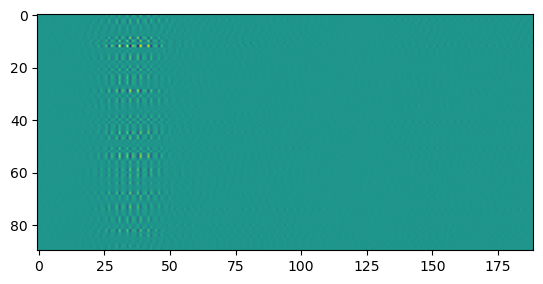

In [33]:
plt.imshow(LeftRadar[9592])

In [34]:
LeftRadarLabels.shape

(9593, 12)

<h3 style="text-align: left;"><b>2.2 Группировка изображений по принципу train and test:</b></h3>


In [35]:
from sklearn.model_selection import train_test_split

'''
Разделим фотографии для обучающего датасета на две группы, тренировочные и тестовые.
Radar_train - 7674
Radar_test - 1919
Labels_train - 7674
Labels_test - 1919
'''
Radar_train, Radar_test, Labels_train, Labels_test = train_test_split(LeftRadar, LeftRadarLabels, test_size=0.2)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


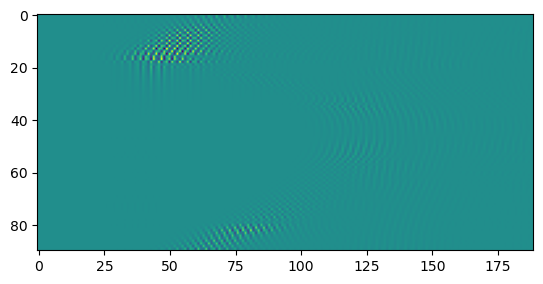

In [36]:
print(Labels_train[554])
plt.imshow(Radar_train[554])

<h3 style="text-align: left;"><b>2.3 Подготовка даталоадеров:</b></h3>


In [37]:
from torch.utils.data import DataLoader

train_loader = DataLoader(list(zip(Radar_train.reshape(-1, 1, 90, 189), Labels_train)), batch_size=64, shuffle=True)
test_loader = DataLoader(list(zip(Radar_test.reshape(-1, 1, 90, 189), Labels_test)), batch_size=64, shuffle=True)

for images, labels in train_loader:
    print(images.shape)  # Должно быть что-то вроде (batch_size, 1, 90, 189) для одноканальных изображений
    print(labels.shape)
    break
    

torch.Size([64, 1, 90, 189])
torch.Size([64, 12])


# Шаг 3 (Прописываем функции train, fit epoch, eval epoch, predict):

In [38]:
import torch

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

# работаем на видеокарте
DEVICE = torch.device("cuda")
print('DEVICE: ', DEVICE)

CUDA is available!  Training on GPU ...
DEVICE:  cuda


In [39]:
def fit_epoch(model, train_loader, criterion, optimizer, scheduler):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        #print("=======", inputs.shape)

        outputs = model(inputs)
        #print(outputs.shape, labels.shape)
        #print(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
#         scheduler.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)

        
        #print('//\\', preds.shape)
        #print('//\\', labels.shape)

        #print('//\\', preds)
        #print('//\\', torch.argmax(labels, dim=1))
        
        #running_corrects += torch.sum(preds == labels.data)
        running_corrects += torch.sum(preds == torch.argmax(labels, dim=1))
        processed_data += inputs.size(0)
    scheduler.step()
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [40]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)

        #print('//\\', preds.shape)
        #print('//\\', labels.shape)

        #running_corrects += torch.sum(preds == labels.data)
        running_corrects += torch.sum(preds == torch.argmax(labels, dim=1))
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [41]:
def train(train_loader, val_loader, model, epochs, criterion):
    # train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    # val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(params=model.parameters(), lr = 1e-4)
        
        
        exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=1, gamma=0.5)
        #criterion = nn.CrossEntropyLoss()
        #criterion = loss_fn

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt, exp_lr_scheduler)
            print("loss", train_loss)
            print('lr: ', opt.param_groups[0]['lr'])
#             scheduler.step()

            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))

            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))

    return history

In [42]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []

        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
#             outputs = model(inputs).cuda()
            logits.append(outputs)

    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [66]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=1).numpy()
    return probs

# Шаг 4 (Модель):

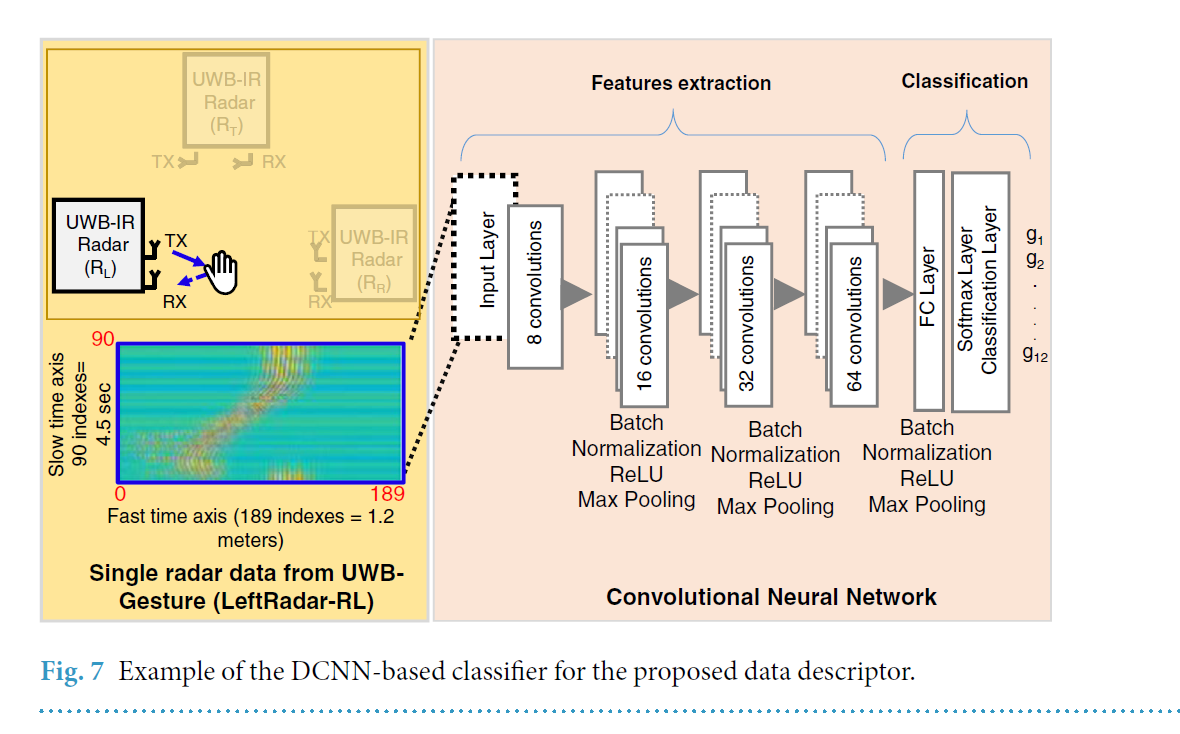

In [44]:
import torch.nn as nn

class UWB_CNN(nn.Module):
    def __init__(self):
        super().__init__()

        # 1-й Convolution Sequential
        # На входе изображение: 1x90x189
        # На выходе карта активации: 32x84x183
        self.conv1 = nn.Sequential( 
                            nn.Conv2d(1, 32, kernel_size=7, stride=1, padding=0),  # in_channels, out_channels
                            nn.BatchNorm2d(32, momentum=0.5),
                            nn.ReLU()
        )

        # 2-й Convolution Sequential
        # На входе карта активации:  32x84x183
        # На выходе карта активации: 64x80x179
        self.conv2 = nn.Sequential( 
                            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=0),  # in_channels, out_channels
                            nn.BatchNorm2d(64, momentum=0.5),
                            nn.ReLU()
        )

        # 3-й Convolution Sequential
        # На входе карта активации: 64x80x179
        # На выходе карта активации: 128x72x171
        self.conv3 = nn.Sequential( 
                            nn.Conv2d(64, 128, kernel_size=9, stride=1, padding=0),  # in_channels, out_channels
                            nn.BatchNorm2d(128, momentum=0.5),
                            nn.ReLU()
        )

        # 4-й Convolution Sequential
        # На входе карта активации: 128x72x171
        # На выходе карта активации: 256x64x163
        # Flatten - преобразуем в одномерный массив.
        self.conv4 = nn.Sequential( 
                            nn.Conv2d(128, 8, kernel_size=9, stride=1, padding=0),  # in_channels, out_channels
                            nn.BatchNorm2d(8, momentum=0.5),
                            nn.ReLU(),
                            nn.Flatten()
        )

        
        # 1-й Linear Layer
        self.lin1 = nn.Sequential(
                            nn.Linear(in_features = 8*64*163, out_features=384, bias=True),
                            nn.BatchNorm1d(384, momentum=0.3),
                            nn.ReLU()
        )

        # 2-й Linear Layer
        self.lin2 = nn.Sequential(
                            nn.Linear(in_features = 384, out_features=256, bias=True),
                            nn.BatchNorm1d(256, momentum=0.3),
                            nn.ReLU()
        )


        # Prediction Layer
        self.prediction = nn.Linear(in_features = 256, out_features=12, bias=True)

    
    def forward(self, x):

        #print('image: ', x.shape)
        
        # 1-й Convolution:
        #x = self.conv1(x)
        x = self.conv1(x.float())
        #print('1-й Convolution: ', x.shape)
        
        # 2-й Convolution:
        x = self.conv2(x)
        #print('2-й Convolution: ', x.shape)
        
        # 3-й Convolution:
        x = self.conv3(x)
        #print('3-й Convolution: ', x.shape)

        # 4-й Convolution:
        x = self.conv4(x)
        #print('4-й Convolution(Flatten): ', x.shape)


        # 1-й Linear Layer
        x = self.lin1(x)
        #print('1-й Linear: ', x.shape)

        # 2-й Linear Layer
        x = self.lin2(x)
        #print('2-й Linear: ', x.shape)

        x = self.prediction(x)
        #print('prediction: ', x.shape)
        return x


In [45]:
UWB_model = UWB_CNN()

In [46]:
import pickle
from tqdm import tqdm, tqdm_notebook

criterion = nn.CrossEntropyLoss()

history = train(train_loader, test_loader, model=UWB_model.cuda(), epochs=2, criterion=nn.CrossEntropyLoss())


#train_dat    = torch.utils.data.TensorDataset(torch.tensor(test_data_x).to(device), torch.tensor(test_data_y).to(device))
# Сохранем модель
torch.save(UWB_model.state_dict(),'UWB_model.pth')

epoch:   0%|                                                                                     | 0/2 [00:00<?, ?it/s]

loss 0.6371790234664002
lr:  5e-05


epoch:  50%|██████████████████████████████████████                                      | 1/2 [12:20<12:20, 740.67s/it]


Epoch 001 train_loss: 0.6372     val_loss 0.3254 train_acc 0.8568 val_acc 0.9302
loss 0.19064049928041676
lr:  2.5e-05


epoch: 100%|████████████████████████████████████████████████████████████████████████████| 2/2 [25:09<00:00, 754.89s/it]



Epoch 002 train_loss: 0.1906     val_loss 0.2106 train_acc 0.9372 val_acc 0.9255


In [ ]:
torch.cuda.empty_cache()

In [91]:
# Можно загрузить обученную модель.
UWB_model_2 = UWB_CNN()
UWB_model_2.load_state_dict(torch.load('UWB_model.pth'))

<All keys matched successfully>

In [47]:
loss, acc, val_loss, val_acc = zip(*history)

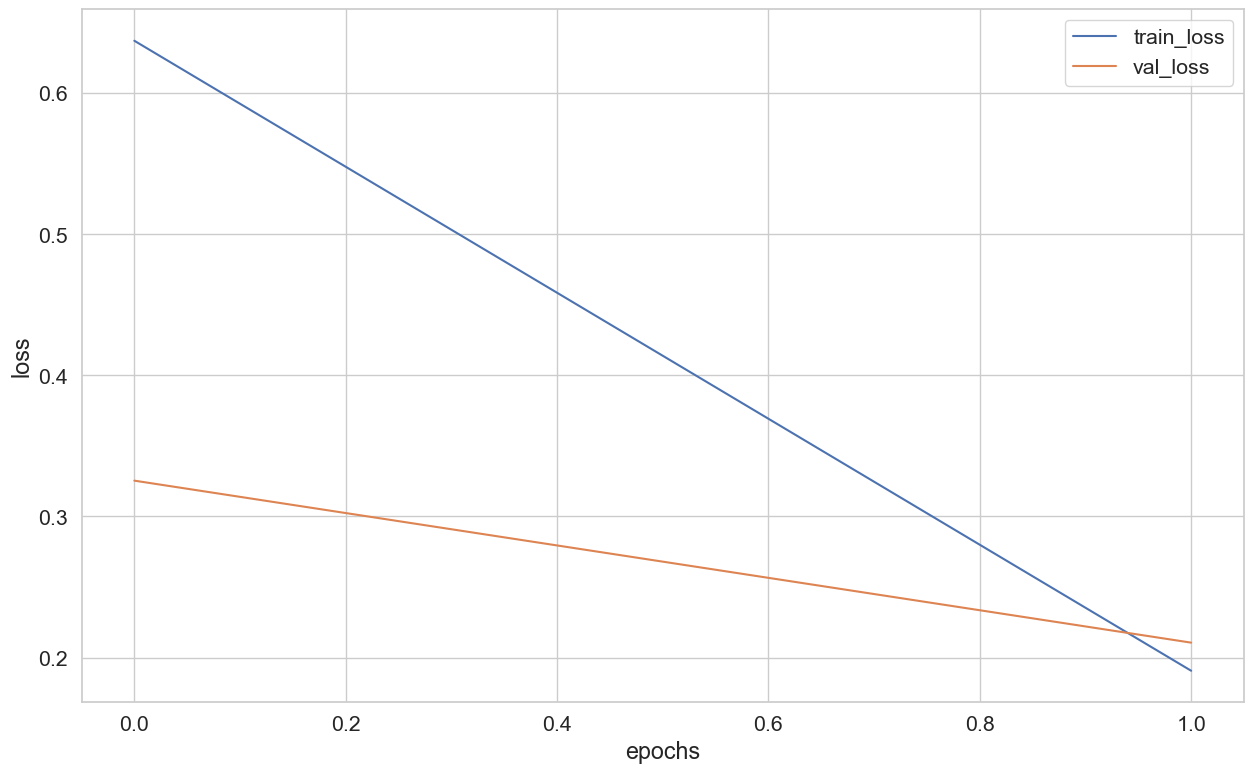

In [48]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.4)

plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

<h3 style="text-align: left;"><b>4.2 Предсказание для отдельного экземпляра из тестовой выборки:</b></h3>


Значение:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Размер тесовой выборки:  1919


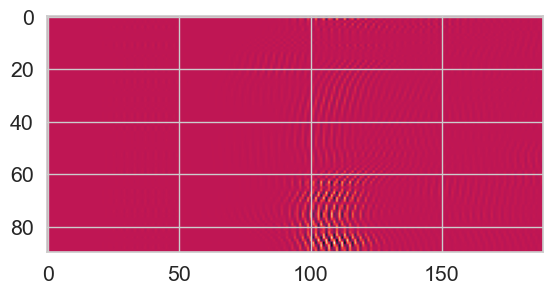

In [85]:
#Radar_train, Radar_test, Labels_train, Labels_test

print("Значение: ", Labels_test[239])
print("Размер тесовой выборки: ", Radar_test.shape[0])

plt.imshow(Radar_test[239])

In [95]:
# Предсказания свежей модели
g = predict_one_sample(UWB_model, torch.from_numpy(Radar_test[239].reshape(-1, 1, 90, 189)))

# Предсказания сохранённой модели
#g = predict_one_sample(UWB_model_2.cuda(), torch.from_numpy(Radar_test[239].reshape(-1, 1, 90, 189)))

In [96]:
torch.argmax(torch.from_numpy(g), dim=1)

tensor([10])